In [1]:
!pip install textblob

In [2]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cufflinks --upgrade

Requirement already up-to-date: cufflinks in /Users/arpitha/opt/anaconda3/lib/python3.8/site-packages (0.17.3)


Note: you may need to restart the kernel to use updated packages.


In [1]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.simplefilter(action='ignore')

%matplotlib inline

In [2]:
from textblob import TextBlob
# import cufflinks as cf
# from plotly.offline import plot
import plotly.offline as py

In [3]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/arpitha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/arpitha/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
reddit_df = pd.read_csv('target_data.csv').drop(columns='Unnamed: 0')

In [5]:
reddit_df.head()

,text,title,target
0,We understand that most people who reply immed...,Our most-broken and least-understood rules is ...,1
1,Welcome to /r/depression's check-in post - a p...,"Regular Check-In Post. Plus, a reminder about ...",1
2,Kind of proud of myself for making it through ...,No friends so im venting here. Just skip.,1
3,my parents when i wake up early: \n\noh my god...,my parents when i wake up late: this isn't nor...,1
4,I hope someone will read this. I wanna tell my...,"Please, I need help",1


In [6]:
reddit_df.shape

(9526, 3)

In [7]:
##Dropping duplicate records to reduce noise
reddit_df.drop_duplicates(keep='first', inplace=True)

In [8]:
reddit_df.shape

(7091, 3)

In [9]:
reddit_df.isnull().sum()

text      2663
title        0
target       0
dtype: int64

In [10]:
reddit_df.fillna('missingtext', inplace=True)

In [11]:
reddit_df.isnull().sum()

text      0
title     0
target    0
dtype: int64

In [12]:
reddit_df.target.value_counts(normalize=True)

1    0.524327
0    0.475673
Name: target, dtype: float64

In [13]:
reddit_df.head(10)

,text,title,target
0,We understand that most people who reply immed...,Our most-broken and least-understood rules is ...,1
1,Welcome to /r/depression's check-in post - a p...,"Regular Check-In Post. Plus, a reminder about ...",1
2,Kind of proud of myself for making it through ...,No friends so im venting here. Just skip.,1
3,my parents when i wake up early: \n\noh my god...,my parents when i wake up late: this isn't nor...,1
4,I hope someone will read this. I wanna tell my...,"Please, I need help",1
5,i just had a conversation with my mother that ...,opening up is fucking impossible,1
6,Video games were the thing i always did whenev...,I can't enjoy the shelter of video games anymore.,1
7,"Hi, i just wanted to tell all the people that ...",It will be okay.,1
8,"Hey guys, hope you are having an amazing morni...",[L][20 F] Broken Heart,1
9,i bet my post will be completely ignored. like...,i really dont know what to do anymore,1


In [14]:
reddit_df.to_csv('clean_data.csv')

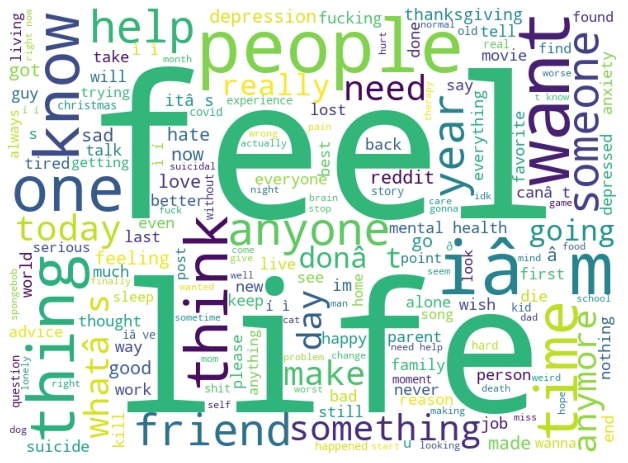

In [15]:
wc_df = pd.read_csv('clean_data.csv', encoding ='latin-1') 
  
text = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for x in wc_df.title: 
      
    # typecaste each val to string 
    x = str(x) 
  
    # split the value 
    values = x.split() 
      
    # Converts each token into lowercase 
    for i in range(len(values)): 
        values[i] = values[i].lower() 
          
    for words in values: 
        text = text + words + ' '
  
  
wc = WordCloud(max_words= 500,
                      width = 744, 
                      height = 544,
                      background_color ='white',
                      stopwords=stopwords, 
                      contour_width=3, 
                      contour_color='steelblue',
                      min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (11, 11)) 
plt.imshow(wc) 
plt.axis("off")
plt.savefig('reddit_wordcloud.png')

In [16]:
def preprocess(text):
    text = text.str.replace("(<br/>)", "")
    text = text.str.replace('(<a).*(>).*(</a>)', '')
    text = text.str.replace('(&amp)', '')
    text = text.str.replace('(&gt)', '')
    text = text.str.replace('(&lt)', '')
    text = text.str.replace('(\xa0)', ' ')  
    return text

df = pd.read_csv('clean_data.csv')

df['text'] = preprocess(df['text'])

df['polarity'] = df['text'].map(lambda text: TextBlob(text).sentiment.polarity)
df['post_len'] = df['text'].astype(str).apply(len)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

In [41]:
df

,Unnamed: 0,text,title,target,polarity,post_len
0,0,We understand that most people who reply immed...,Our most-broken and least-understood rules is ...,1,0.132340,4792
1,1,Welcome to /r/depression's check-in post - a p...,"Regular Check-In Post. Plus, a reminder about ...",1,0.316830,1225
2,2,Kind of proud of myself for making it through ...,No friends so im venting here. Just skip.,1,0.219298,1049
3,3,my parents when i wake up early: \n\noh my god...,my parents when i wake up late: this isn't nor...,1,0.300000,176
4,4,I hope someone will read this. I wanna tell my...,"Please, I need help",1,-0.027249,1006
...,...,...,...,...,...,...
7086,9244,missingtext,real talk this song is beyond amazing,0,0.000000,11
7087,9245,missingtext,Wear your masks right,0,0.000000,11
7088,9246,missingtext,With a little bit of photoshop anything is pos...,0,0.000000,11
7089,9247,missingtext,We can do it kings,0,0.000000,11


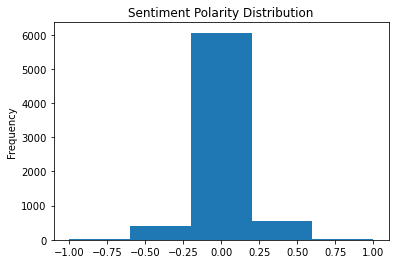

In [23]:
df['polarity'].plot(
    kind='hist',
    bins=5,
#     xTitle='polarity',
#     linecolor='black',
#     yTitle='count',
    title='Sentiment Polarity Distribution')

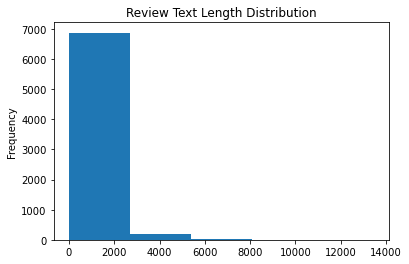

In [24]:
df['post_len'].plot(
    kind='hist',
    bins=5,
#     xTitle='review length',
#     linecolor='black',
#     yTitle='count',
    title='Review Text Length Distribution')

to 24791
and 23750
the 16824
my 15363
it 12488
of 10732
me 9780
that 9505
in 8241
but 7562
for 6850
is 6560
just 6534
have 6400
this 6028
so 5891
was 5726
with 5517
like 4787
you 4537


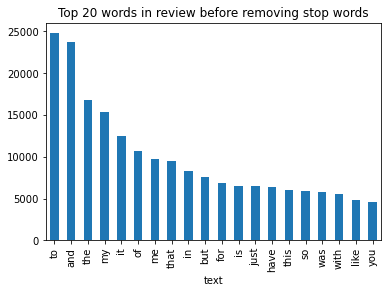

In [26]:
##N-gram of Top 20 words in review before removing stop words - using CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df1.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in review before removing stop words')
#yTitle='Count', linecolor='black', 

just 6534
like 4787
don 4284
feel 3859
know 3231
want 2908
ve 2781
missingtext 2663
life 2519
really 2303
people 2300
time 2285
think 1633
things 1486
day 1434
going 1424
friends 1335
help 1291
family 1158
good 1131


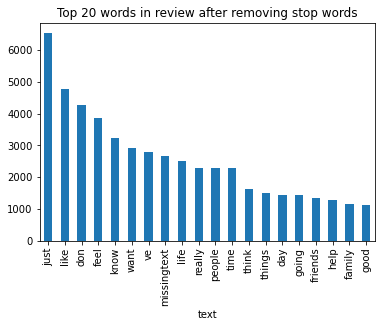

In [27]:
##N-gram of Top 20 words in review after removing stop words - using CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df2.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in review after removing stop words')

missingtext 2663.0
just 264.8908883193385
like 202.4845788684759
don 195.9632430302836
feel 186.1639656785298
want 159.43331886738673
know 150.43911464686667
ve 134.46411326155464
life 130.07928297791855
really 119.12550702613585
people 114.5172002198818
time 108.992047876751
think 91.7440601837003
day 82.63944575221893
going 82.30059014931209
friends 79.26852338915191
help 79.19428802660863
things 78.2981588328976
im 71.55870160569178
family 70.99407876612088


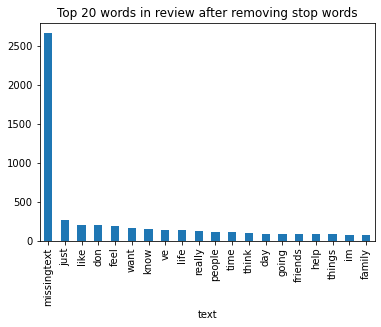

In [28]:
##N-gram of Top 20 words in review after removing stop words - using tfidf vectorizer
def get_top_n_words(corpus, n=None):
    vec = TfidfVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df2.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in review after removing stop words')

want to 2116
to be 1663
in the 1511
feel like 1328
in my 1225
to do 1186
of the 1136
of my 1132
my life 1084
don know 1056
to get 848
it was 832
me and 830
and it 795
to me 783
ve been 774
to the 763
with my 709
going to 707
out of 698


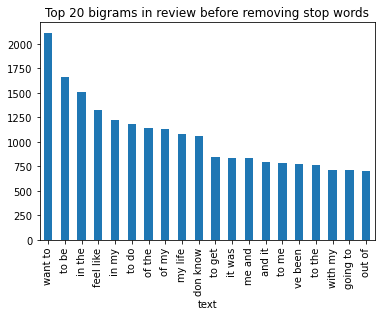

In [29]:
##bigram of Top 20 words in review before removing stop words
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df3.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review before removing stop words')

feel like 1342
don know 1156
don want 642
just want 459
mental health 369
just feel 264
feels like 251
just don 250
don think 187
don feel 185
felt like 161
high school 152
need help 150
dont know 148
years ago 145
don really 141
want die 132
like just 130
best friend 127
long time 119


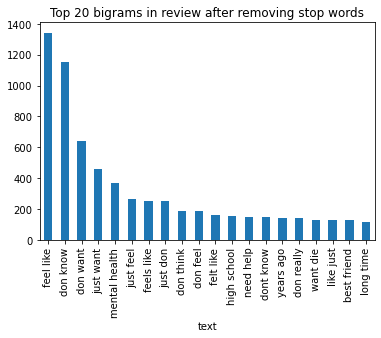

In [30]:
##bigram of Top 20 words in review after removing stop words - using CountVectorizer
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df4.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review after removing stop words')

feel like 57.445419275481726
don know 50.09068535629151
don want 33.0578184097664
just want 29.178508477222408
mental health 19.710276171919375
just feel 16.458547968953606
feels like 15.344655864061252
just don 14.647562510684683
want die 12.916000342997128
don feel 12.274984193974712
dont know 11.240639281829127
don think 11.0086279017187
felt like 9.39735027585752
https www 9.040245852155929
like just 8.83881082801824
feel better 8.503766158383383
don really 8.384929731258955
best friend 8.365568152583208
life just 8.197964577585518
feeling like 8.175973510304361


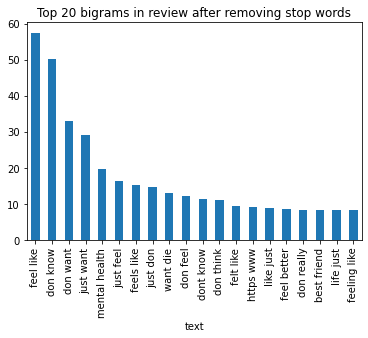

In [31]:
##bigram of Top 20 words in review after removing stop words - using TfidfVectorizer
def get_top_n_bigram(corpus, n=None):
    vec = TfidfVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df4.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review after removing stop words')

don want to 471
don know what 369
what to do 322
just want to 312
know what to 296
in my life 286
want to be 286
to talk to 278
be able to 208
of my life 200
know how to 190
don know how 186
all the time 184
to kill myself 152
it feels like 145
and don know 142
don know if 142
for me to 141
to do it 137
to go to 129


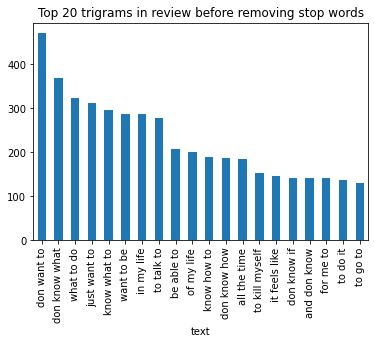

In [32]:
##trigram of Top 20 words in review before removing stop words - using CountVectorizer
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df5.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams in review before removing stop words')

just feel like 99
just don know 82
sorry sorry sorry 80
don feel like 65
help need help 63
need help need 60
don know anymore 59
just don want 48
mental health issues 44
feel like just 44
don know just 41
feel like ve 38
don know feel 35
www reddit com 34
feel like shit 33
don really know 31
https www reddit 31
don know going 31
https www youtube 30
www youtube com 30


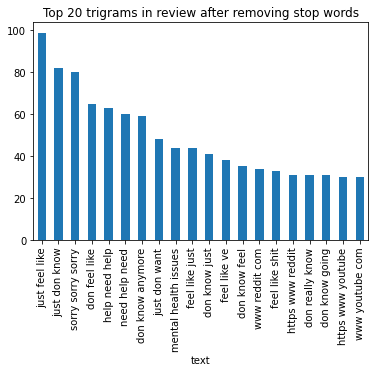

In [33]:
##trigram of Top 20 words in review after removing stop words - using CountVectorizer
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df6.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams in review after removing stop words')

just feel like 7.377530841119399
don feel like 5.445082164991883
just don know 5.001659248815028
www reddit com 4.6586858173422705
don know anymore 4.599615479884404
https www reddit 4.586492836916994
view poll https 3.942570396070903
poll https www 3.942570396070903
reddit com poll 3.942570396070903
https www youtube 3.8191370388758563
www youtube com 3.8191370388758563
youtube com watch 3.51154199569867
feel like just 3.4106289871913775
don know feel 3.3088212843846248
don know just 3.268730464777307
just don want 3.2502454504406626
https preview redd 2.9667799191960587
feel like shit 2.95420067423618
feel like ve 2.8573944003676
mental health issues 2.823574489471925


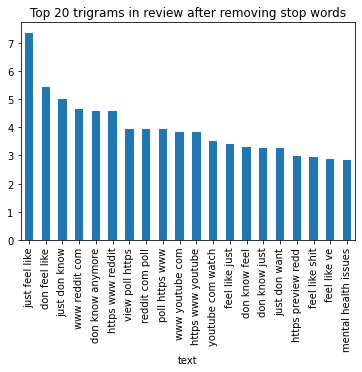

In [34]:
##trigram of Top 20 words in review after removing stop words - using TfidfVectorizer
def get_top_n_trigram(corpus, n=None):
    vec = TfidfVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df6.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams in review after removing stop words')

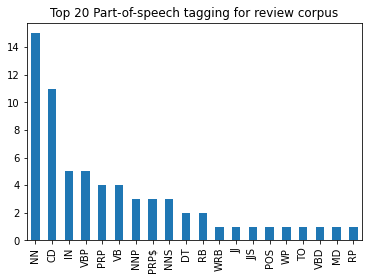

In [35]:
blob = TextBlob(str(df['text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(
    kind='bar',
    title='Top 20 Part-of-speech tagging for review corpus')